#OGB - MolHIV

In [4]:
!pip install ogb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=bd05fc8c8f57894abfdd5f7b88e0fd287aeda2049902acb5d3b6ed703c7b9a6d
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [5]:
from ogb.graphproppred import GraphPropPredDataset

dataset_name = 'ogbg-molhiv'
dataset = GraphPropPredDataset(name=dataset_name)
split_idx = dataset.get_idx_split()

Downloaded 0.00 GB: 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]


Extracting dataset/hiv.zip
Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 41127/41127 [00:01<00:00, 29166.96it/s]


Saving...


In [6]:
data_list = dataset.graphs

In [7]:
split_idx

{'train': array([    3,     4,     5, ..., 41124, 41125, 41126]),
 'valid': array([10127, 10129, 10132, ..., 22785, 22786, 22788]),
 'test': array([    0,     1,     2, ..., 10122, 10124, 10125])}

In [8]:
def split_list_by_indices(data_list, split_indices):
    train_idx = split_indices.get('train', [])
    valid_idx = split_indices.get('valid', [])
    test_idx = split_indices.get('test', [])

    train_set = [data_list[i] for i in train_idx]
    valid_set = [data_list[i] for i in valid_idx]
    test_set = [data_list[i] for i in test_idx]

    return train_set, valid_set, test_set

train_set, valid_set, test_set = split_list_by_indices(data_list, split_idx)

#print("Training set:", train_set)

In [9]:
print("Test set:", test_set[:3])

Test set: [{'edge_index': array([[ 0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
         6,  9,  4, 10, 10, 11, 11, 12, 12, 13, 11, 14, 14, 15, 15, 16,
        16, 17, 15, 18,  9,  2, 18,  4],
       [ 1,  0,  2,  1,  3,  2,  4,  3,  5,  4,  6,  5,  7,  6,  8,  7,
         9,  6, 10,  4, 11, 10, 12, 11, 13, 12, 14, 11, 15, 14, 16, 15,
        17, 16, 18, 15,  2,  9,  4, 18]]), 'edge_feat': array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0,

##General Scaffold

In [10]:
pip install ogb rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 14.9 MB/s eta 0:00:00


In [19]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold


smiles = "c1cc(O)ccc1c2cccNcc2C(=O)CN"


mol = Chem.MolFromSmiles(smiles)
scaffold = MurckoScaffold.MurckoScaffoldSmiles(Chem.MolToSmiles(mol)).replace("*", "")

print(f"Original SMILES: {smiles}")
print(f"Murcko Scaffold: {scaffold}")

Original SMILES: c1cc(O)ccc1c2cccNcc2C(=O)CN
Murcko Scaffold: C1=CNC=CC(c2ccccc2)=C1


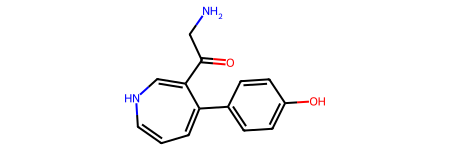

In [20]:
mol

In [17]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
import random

smiles_list = [
    "CC(=O)OC1=CC=CC=C1C(=O)O",
    "CC(C)(C)C1=CC=CC=C1",
    "C1=CC=CC=C1",
    "CCN(CC)C(=O)C1=CC=CC=C1",
    "CC(C)C1=CC=CC=C1",
    "c1ccccc1C(=O)OCC",
    "c1ccccc1C(=O)OCCOc1ccccc1NO",
    "C(=O)OCCONO",
    "C(=O)NOc1ccccc1c2ccccc2CC(=O)c2ccccc2",
    "c1cc(O)ccc1c2cccNcc2C(=O)CN"
]


molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]


def scaffold_splitting(molecules, frac_train=0.8, frac_valid=0.1, frac_test=0.1, random_seed=40):
    random.seed(random_seed)
    scaffolds = [MurckoScaffold.GetScaffoldForMol(mol) for mol in molecules]
    unique_scaffolds = list(set(scaffolds))
    random.shuffle(unique_scaffolds)

    num_scaffolds = len(unique_scaffolds)
    #print(num_scaffolds)
    train_size = int(frac_train * num_scaffolds)
    valid_size = int(frac_valid * num_scaffolds)
    train_scaffolds, valid_scaffolds, test_scaffolds = (
        unique_scaffolds[:train_size],
        unique_scaffolds[train_size:train_size + valid_size],
        unique_scaffolds[train_size + valid_size:]
    )
    train_molecules = [mol for mol, scaffold in zip(molecules, scaffolds) if scaffold in train_scaffolds]
    valid_molecules = [mol for mol, scaffold in zip(molecules, scaffolds) if scaffold in valid_scaffolds]
    test_molecules = [mol for mol, scaffold in zip(molecules, scaffolds) if scaffold in test_scaffolds]

    return train_molecules, valid_molecules, test_molecules

train_set, valid_set, test_set = scaffold_splitting(molecules)

print("Train Set:")
for mol in train_set:
    print(Chem.MolToSmiles(mol))

print("\nValidation Set:")
for mol in valid_set:
    print(Chem.MolToSmiles(mol))

print("\nTest Set:")
for mol in test_set:
    print(Chem.MolToSmiles(mol))


10
Train Set:
CC(=O)Oc1ccccc1C(=O)O
c1ccccc1
CC(C)c1ccccc1
CCOC(=O)c1ccccc1
O=C(OCCOc1ccccc1NO)c1ccccc1
O=COCCONO
O=CNOc1ccccc1-c1ccccc1CC(=O)c1ccccc1
NCC(=O)C1=CNC=CC=C1c1ccc(O)cc1

Validation Set:
CCN(CC)C(=O)c1ccccc1

Test Set:
CC(C)(C)c1ccccc1
